In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_index = pd.read_csv("multiple_linear_reg.csv")
df_index.head()

,Unnamed: 0,year,interest_rate,unemployment_rate,index_price
0,0,2017,12,5.3,1464
1,1,2017,11,5.3,1394
2,2,2017,10,5.3,1357
3,3,2017,9,5.3,1293
4,4,2017,8,5.4,1256


In [14]:
#drop unnecessary column
df_index.drop(columns=["Unnamed: 0","year"],axis = 1,inplace = True)

KeyError: "['Unnamed: 0', 'year'] not found in axis"

In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,12,5.3,1464
1,11,5.3,1394
2,10,5.3,1357
3,9,5.3,1293
4,8,5.4,1256


In [9]:
##check null value
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

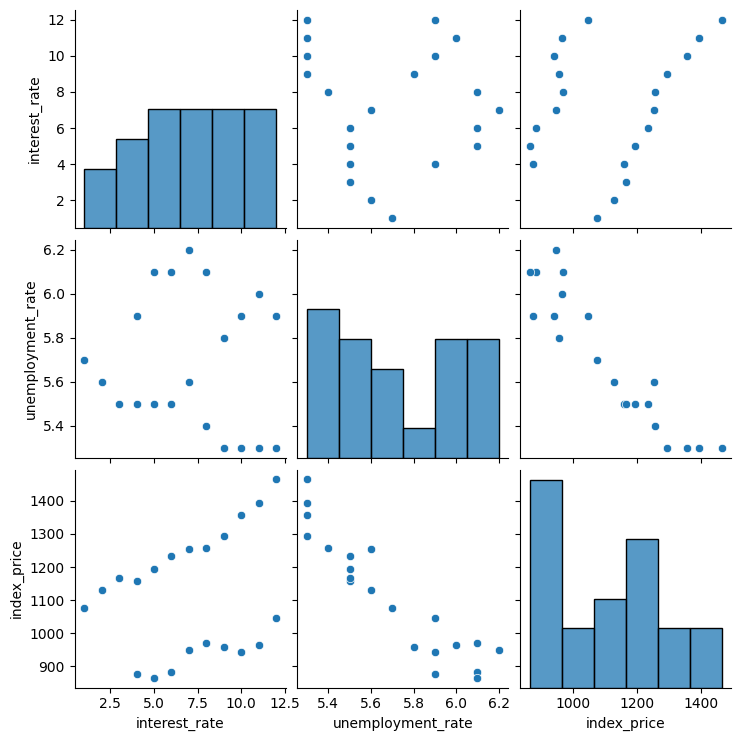

In [10]:
##lets do visuallization
import seaborn as sns
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.088716,0.265801
unemployment_rate,-0.088716,1.000000,-0.926645
index_price,0.265801,-0.926645,1.000000


Text(0, 0.5, 'unemployment rate')

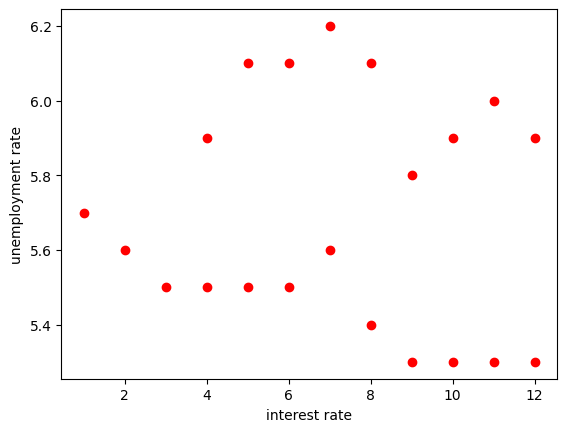

In [18]:
##visuallize the data points more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="r")
plt.xlabel("interest rate")
plt.ylabel("unemployment rate")

In [19]:
##independent and dependent features
x = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [20]:
x.head()

,interest_rate,unemployment_rate
0,12,5.3
1,11,5.3
2,10,5.3
3,9,5.3
4,8,5.4


In [21]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [22]:
x

,interest_rate,unemployment_rate
0,12,5.3
1,11,5.3
2,10,5.3
3,9,5.3
4,8,5.4
5,7,5.6
6,6,5.5
7,5,5.5
8,4,5.5
9,3,5.5


In [23]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
Name: index_price, dtype: int64

In [26]:
##train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [27]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

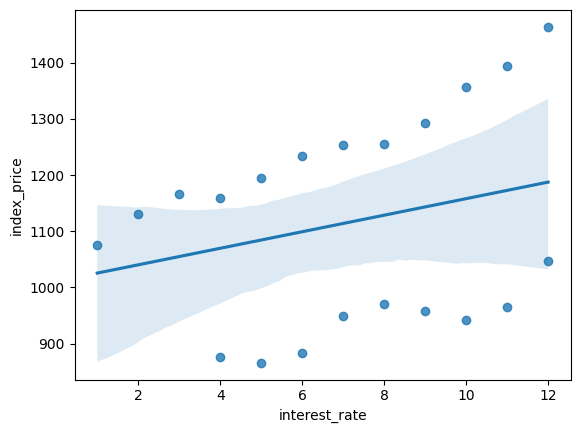

In [32]:
sns.regplot(x = df_index["interest_rate"],y = df_index["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

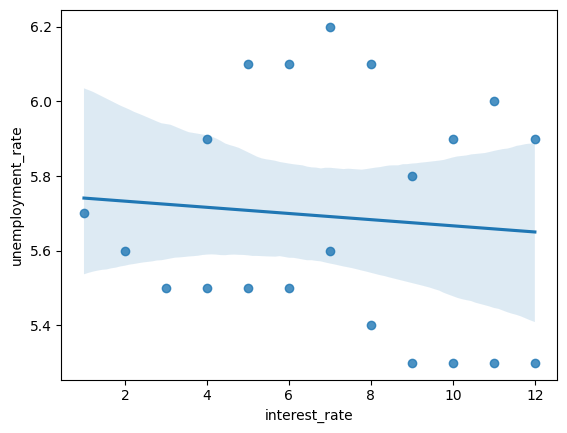

In [33]:
sns.regplot(x = df_index["interest_rate"],y = df_index["unemployment_rate"])

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [36]:
x_train

array([[-1.73868127, -0.070014  ],
       [ 0.71592758, -1.47029409],
       [-0.20455074,  1.33026608],
       [ 0.40910147,  1.33026608],
       [ 1.32957979,  0.98019606],
       [ 1.02275369, -1.47029409],
       [-1.12502906, -0.77015405],
       [-0.81820295,  0.63012604],
       [ 0.40910147, -1.12022407],
       [ 1.6364059 ,  0.63012604],
       [-0.51137684, -0.77015405],
       [-1.43185516, -0.42008403],
       [ 1.02275369,  0.63012604],
       [-0.51137684,  1.33026608],
       [-0.20455074, -0.77015405]])

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [39]:
regression.fit(x_train,y_train)

LinearRegression()

In [40]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring = "neg_mean_squared_error",cv = 3)

In [42]:
np.mean(validation_score)

-3359.4310140935827

In [43]:
##prediction
y_pred = regression.predict(x_test)

In [44]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

19336.231226696265
126.70880355019243
139.05477779168993


In [46]:
##performing R2(R squared)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.5029530416992278


In [49]:
##performing adjusted R2(R squared)
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.17158840283204635


##Assumptions

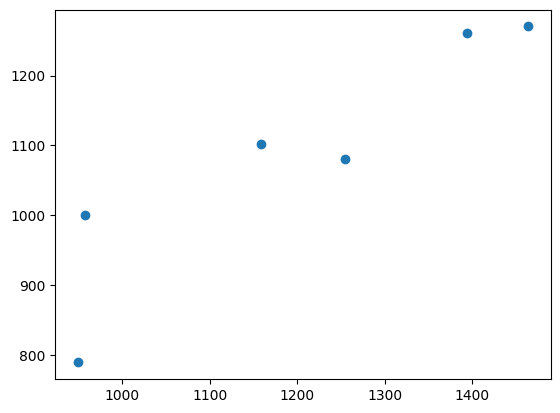

In [50]:
plt.scatter(y_test,y_pred)

In [51]:
residuals = y_test-y_pred
print(residuals)

0     193.530385
17    160.125001
15    -42.926411
1     132.488264
8      57.261241
5     173.921519
Name: index_price, dtype: float64


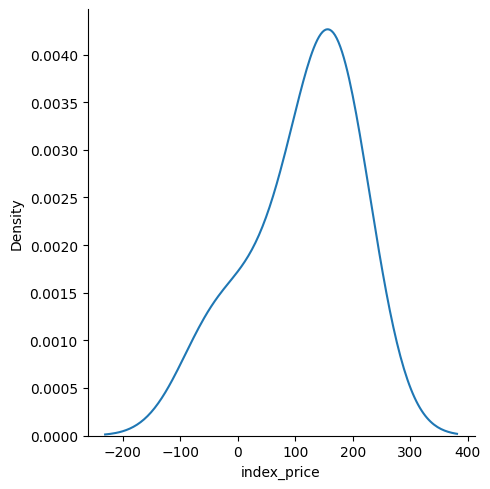

In [52]:
##plot the residuals
sns.displot(residuals,kind = "kde")

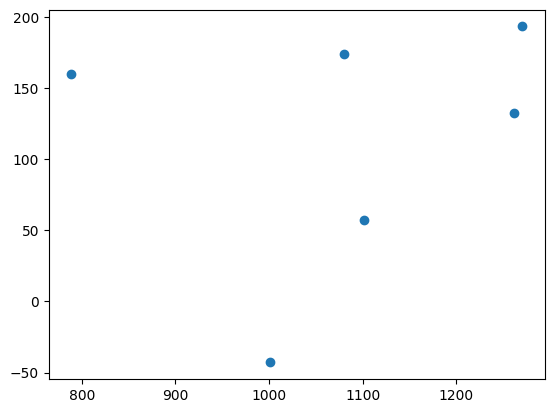

In [53]:
##scatter plot with predictions and residuals
plt.scatter(y_pred,residuals)

In [54]:
##OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [55]:
model.summary()

c:\program files\python38\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):             -0.132
Method:                 Least Squares   F-statistic:                             0.1276
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                       0.881
Time:                        11:28:12   Log-Likelihood:                         -126.12
No. Observations:                  15   AIC:                                      256.2
Df Residuals:                      13   BIC:                                      257.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            24.0736    301.773      0.080      0.938    -627.867     676.014
x2          -151.9782    301.773     -0.504      0.623    -803.918     499.962
==============================================================================
Omnibus:                        3.003   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                1.093
Skew:                          -0.587   Prob(JB):                        0.579
Kurtosis:                       3.610   Cond. No.                         1.08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(regression.coef_)

[  24.07357538 -151.97824171]
